## Silver Alert Greece - Tρέχουσες Εξαφανίσεις Γραμμή Ζωής
**Παπαχρήστου Σοφία**

Θα πάρω από την σελίδα αυτή όσες πληροφορίες μπορώ για τους εξαφανισμένους
https://www.lifelinehellas.gr/category/%CE%B5%CE%BE%CE%B1%CF%86%CE%B1%CE%BD%CE%B9%CF%83%CE%B8%CE%AD%CE%BD%CF%84%CE%B5%CF%82/

και μετά θα ανοίξω κάθε url εξαφανισμένου για να βρω όσες πληροφορίες δεν υπήρχαν στην γενική σελίδα, στο κείμενο που περιέχει το εκάστοτε url.

In [1]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
import requests
import time

In [2]:
from urllib.request import Request, urlopen
req = Request('https://www.lifelinehellas.gr/category/%CE%B5%CE%BE%CE%B1%CF%86%CE%B1%CE%BD%CE%B9%CF%83%CE%B8%CE%AD%CE%BD%CF%84%CE%B5%CF%82/', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
silver_alert = BeautifulSoup(webpage, "html.parser")

## 1. Βρίσκω το όνομα του εξαφανισμένου

In [ ]:
#names = silver_alert.find_all('div', {'class': 'content-box'})
names = silver_alert.find_all('div', {'class': 'image'}) #παιρνω απο εδώ το όνομα γιατί στις τελευταιες σελίδες δεν έχει content box στην html

for n in names:
  print(n.a['title'])

ΟΛΥΜΠΙΑΔΑ ΡΗΓΑ
ΦΑΝΗ ΠΑΡΑΦΕΣΤΑ
ΕΥΓΕΝΙΑ – ΜΑΡΙΑ ΒΟΥΝΙΟΖΟΥ
ΕΥΦΗΜΙΑ ΔΗΜΟΠΟΥΛΟΥ
ΚΩΝΣΤΑΝΤΙΝΟΣ ΖΑΦΕΙΡΟΠΟΥΛΟΣ
ΣΤΥΛΙΑΝΟΣ ΣΠΥΡΟΥ
DERVISHI KELVIN
ΠΕΡΙΚΛΗΣ ΤΑΧΑΤΟΣ
ΠΑΝΑΓΙΩΤΗΣ ΚΑΛΕΣΗΣ
ΙΩΑΝΝΗΣ ΓΙΑΝΝΗΣ


## 2. Βρίσκω την ημερομηνία εξαφάνισης

In [ ]:
post_box = silver_alert.find('div', attrs={'class': 'post-box'})

for d in post_box.findAll("article"):
    print(d.get('sort_date'))

2022-06-25 22:44:41
2022-06-20 15:35:19
2022-05-31 11:04:55
2022-05-23 21:22:33
2022-05-12 21:06:44
2022-05-01 11:55:08
2022-04-11 22:27:58
2022-04-06 18:20:48
2022-04-03 14:44:32
2022-04-02 00:13:52


In [ ]:
dates = silver_alert.find_all('div', {'class': 'image'})

for d in dates:
  print(d.span.text)


                            25 Ιούνιος, 2022                        

                            20 Ιούνιος, 2022                        

                            31 Μάιος, 2022                        

                            23 Μάιος, 2022                        

                            12 Μάιος, 2022                        

                            1 Μάιος, 2022                        

                            11 Απρίλιος, 2022                        

                            6 Απρίλιος, 2022                        

                            3 Απρίλιος, 2022                        

                            2 Απρίλιος, 2022                        


## 3. Βρίσκω το url του αρθρου της εξαφάνισης κάθε προσώπου

In [ ]:
#Οπως ειδα και πριν στις τελευταίες σελίδες δεν υπάρχει content box, οπότε όταν πάω να πάρω όλα τα urls θα υπάρχει
#urls = silver_alert.find_all('div', {'class': 'content-box'}) αρα αυτο ακυρο
urls = silver_alert.find_all('div', {'class': 'image'})

for u in urls:
  print(u.a['href'])

https://www.lifelinehellas.gr/%ce%bf%ce%bb%cf%85%ce%bc%cf%80%ce%b9%ce%b1%ce%b4%ce%b1-%cf%81%ce%b7%ce%b3%ce%b1/
https://www.lifelinehellas.gr/%cf%86%ce%b1%ce%bd%ce%b7-%cf%80%ce%b1%cf%81%ce%b1%cf%86%ce%b5%cf%83%cf%84%ce%b1/
https://www.lifelinehellas.gr/%ce%bc%ce%b1%cf%81%ce%b9%ce%b1-%ce%b2%ce%bf%cf%85%ce%bd%ce%b9%ce%bf%ce%b6%ce%bf%cf%85/
https://www.lifelinehellas.gr/11294-2/
https://www.lifelinehellas.gr/%ce%ba%cf%89%ce%bd%cf%83%cf%84%ce%b1%ce%bd%cf%84%ce%b9%ce%bd%ce%bf%cf%83-%ce%b6%ce%b1%cf%86%ce%b5%ce%b9%cf%81%ce%bf%cf%80%ce%bf%cf%85%ce%bb%ce%bf%cf%83/
https://www.lifelinehellas.gr/%cf%83%cf%84%cf%85%ce%bb%ce%b9%ce%b1%ce%bd%ce%bf%cf%83-%cf%83%cf%80%cf%85%cf%81%ce%bf%cf%85/
https://www.lifelinehellas.gr/dervishi-kelvin/
https://www.lifelinehellas.gr/%cf%80%ce%b5%cf%81%ce%b9%ce%ba%ce%bb%ce%b7%cf%83-%cf%84%ce%b1%cf%87%ce%b1%cf%84%ce%bf%cf%83/
https://www.lifelinehellas.gr/%cf%80%ce%b1%ce%bd%ce%b1%ce%b3%ce%b9%cf%89%cf%84%ce%b7%cf%83-%ce%ba%ce%b1%ce%bb%ce%b5%cf%83%ce%b7%cf%83/
https://www

## 4. Βρίσκω το tag για κάθε άτομο 
π.χ εξαφανισθέντες ή ευρεθέντες ή αγνώστων στοιχείων, μπορεί να ψάξω και αυτά αργότερα

In [ ]:
tags = silver_alert.find_all('span', {'class': 'categories'})

for t in tags:
  print(t.a.text)

Εξαφανισθέντες
Εξαφανισθέντες
Εξαφανισθέντες
Εξαφανισθέντες
Εξαφανισθέντες
Εξαφανισθέντες
Εξαφανισθέντες
Εξαφανισθέντες
Εξαφανισθέντες
Εξαφανισθέντες


Ωραία τώρα δεν υπάρχει κάποια άλλη εμφανής πληροφόρία. Περισσότερα θα πάρω μετά από το κείμενο περιγραφής της εξαφάνισης.

## 5. Scraping
Πρέπει να πάρω όλα τα παραπάνω για όλες τις διαθέσιμες σελίδες, να φτιάξω ενα df και να το αποθηκεύσω. Eνδεικτική μορφή url αλλαγή σελίδας:

https://www.lifelinehellas.gr/category/%CE%B5%CE%BE%CE%B1%CF%86%CE%B1%CE%BD%CE%B9%CF%83%CE%B8%CE%AD%CE%BD%CF%84%CE%B5%CF%82/page/3/
https://www.lifelinehellas.gr/category/%CE%B5%CE%BE%CE%B1%CF%86%CE%B1%CE%BD%CE%B9%CF%83%CE%B8%CE%AD%CE%BD%CF%84%CE%B5%CF%82/page/13/ 

In [ ]:
# Φτιάχνω λίστες που θα γεμίσω με το καθένα δεδομένο
url_list= []
name_list= []
date_list= []
tag_list= []

base_url = "https://www.lifelinehellas.gr/category/%CE%B5%CE%BE%CE%B1%CF%86%CE%B1%CE%BD%CE%B9%CF%83%CE%B8%CE%AD%CE%BD%CF%84%CE%B5%CF%82/page/"

#εδώ θα βάλω να αλλάζει το νούμερο στο url, αντίστοιχα με τον αριθμό σελίδας
for i in range(1,16):
    url = base_url + str(i) + "/"
    #print(url)

    page = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    s = BeautifulSoup(page.content, 'html.parser')

    for n in s.find_all('div', {'class': 'image'}):
      name_list.append(n.a['title'])

    post_box = s.find('div', attrs={'class': 'post-box'})
    for d in post_box.findAll("article"):
        date_list.append(d.get('sort_date'))

    for u in s.find_all('div', {'class': 'image'}):
        url_list.append(u.a['href'])

    for t in s.find_all('span', {'class': 'categories'}):
        tag_list.append(t.a.text)

In [ ]:
# ενδεικτικά Τυπώνει το νούμερο π.χ των links
print(len(url_list))

150


Ωραία τώρα θέλω να ανοίξω κάθε url εξαφανισμένου και να βρω την ηλικία του, ώστε να το προσθέσω και αυτό στο df μου. Θα προσπαθήσω από κάθε άρθρο να βρω που υπάρχουν αριθμοί που συνοδεύονται από την λέξη "..ετών ή ..χρονου/ης" (κολλητά ή όχι το νούμερο). Βέβαια σε κάποιες σελίδες δεν αναφέρουν καθόλου ηλικία στο κείμενο (το έχουν μόνο στην φωτογραφία) ή σε άλλες πιο παλιές σελίδες το url είναι για την φωτογραφία δεν υπάρχει κείμενο, αλλά δεν πειράζει θα το αφήσω κενό.

In [ ]:
import re

In [ ]:
#βρίσκω όλα τα urls μου από το url_list που τα αποθήκευσα νωρίτερα
age_list = []

for i in range(len(url_list)):
  reqs2 = requests.get(url_list[i])
  soup2 = BeautifulSoup(reqs2.content, "html.parser")

  if soup2.find("div", {'class': "entry-content"}):
    for x in soup2.find_all("div", {'class': "entry-content"}):
        age_list.append(re.findall(r"(\d+\W?)+(?:ετών|χρονου|χρονης)", str(x)))
  else:
      age_list.append(None)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

In [ ]:
#επιβεβαιώνω ότι έχει το ίδιο len με τις προηγούμενες λίστες
len(age_list)

150

In [ ]:
missing = pd.DataFrame({'Name': name_list ,'Datetime': date_list, 'Tags': tag_list, 'Url': url_list, 'Age': age_list})
missing.head()

,Name,Datetime,Tags,Url,Age
0,ΟΛΥΜΠΙΑΔΑ ΡΗΓΑ,2022-06-25 22:44:41,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%bf%ce%bb%cf%...,[54 ]
1,ΦΑΝΗ ΠΑΡΑΦΕΣΤΑ,2022-06-20 15:35:19,Εξαφανισθέντες,https://www.lifelinehellas.gr/%cf%86%ce%b1%ce%...,[45 ]
2,ΕΥΓΕΝΙΑ – ΜΑΡΙΑ ΒΟΥΝΙΟΖΟΥ,2022-05-31 11:04:55,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%bc%ce%b1%cf%...,[36 ]
3,ΕΥΦΗΜΙΑ ΔΗΜΟΠΟΥΛΟΥ,2022-05-23 21:22:33,Εξαφανισθέντες,https://www.lifelinehellas.gr/11294-2/,[77 ]
4,ΚΩΝΣΤΑΝΤΙΝΟΣ ΖΑΦΕΙΡΟΠΟΥΛΟΣ,2022-05-12 21:06:44,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%ba%cf%89%ce%...,[35 ]


In [ ]:
missing['Age'] = missing['Age'].str[0]
missing.head()

,Name,Datetime,Tags,Url,Age
0,ΟΛΥΜΠΙΑΔΑ ΡΗΓΑ,2022-06-25 22:44:41,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%bf%ce%bb%cf%...,54
1,ΦΑΝΗ ΠΑΡΑΦΕΣΤΑ,2022-06-20 15:35:19,Εξαφανισθέντες,https://www.lifelinehellas.gr/%cf%86%ce%b1%ce%...,45
2,ΕΥΓΕΝΙΑ – ΜΑΡΙΑ ΒΟΥΝΙΟΖΟΥ,2022-05-31 11:04:55,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%bc%ce%b1%cf%...,36
3,ΕΥΦΗΜΙΑ ΔΗΜΟΠΟΥΛΟΥ,2022-05-23 21:22:33,Εξαφανισθέντες,https://www.lifelinehellas.gr/11294-2/,77
4,ΚΩΝΣΤΑΝΤΙΝΟΣ ΖΑΦΕΙΡΟΠΟΥΛΟΣ,2022-05-12 21:06:44,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%ba%cf%89%ce%...,35


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#missing.to_csv("/content/gdrive/My Drive/Colab Notebooks/silver_alert(missing).csv", sep='t', encoding='utf-8', index=False)

https://raw.githubusercontent.com/SophiaPapach/datajour/main/silver_alert(missing).csv

In [ ]:
#df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/silver_alert(missing).csv", sep='t')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/SophiaPapach/datajour/main/silver_alert(missing).csv", sep='t')

In [4]:
df

,Name,Datetime,Tags,Url,Age
0,ΟΛΥΜΠΙΑΔΑ ΡΗΓΑ,2022-06-25 22:44:41,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%bf%ce%bb%cf%...,54.0
1,ΦΑΝΗ ΠΑΡΑΦΕΣΤΑ,2022-06-20 15:35:19,Εξαφανισθέντες,https://www.lifelinehellas.gr/%cf%86%ce%b1%ce%...,45.0
2,ΕΥΓΕΝΙΑ – ΜΑΡΙΑ ΒΟΥΝΙΟΖΟΥ,2022-05-31 11:04:55,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%bc%ce%b1%cf%...,36.0
3,ΕΥΦΗΜΙΑ ΔΗΜΟΠΟΥΛΟΥ,2022-05-23 21:22:33,Εξαφανισθέντες,https://www.lifelinehellas.gr/11294-2/,77.0
4,ΚΩΝΣΤΑΝΤΙΝΟΣ ΖΑΦΕΙΡΟΠΟΥΛΟΣ,2022-05-12 21:06:44,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%ba%cf%89%ce%...,35.0
...,...,...,...,...,...
145,ΚΟΝΤΟΜΠΑΣΗΣ ΒΑΣΙΛΕΙΟΣ -,2011-09-13 20:27:33,Εξαφανισθέντες,https://www.lifelinehellas.gr/wp-content/uploa...,NaN
146,ΚΑΡΑΝΔΡΕΑΣ ΚΥΡΙΑΚΟΣ -,2011-07-30 20:10:59,Εξαφανισθέντες,https://www.lifelinehellas.gr/wp-content/uploa...,NaN
147,ΡΕΒΙΔΗΣ ΕΥΑΓΓΕΛΟΣ -,2011-05-17 20:04:12,Εξαφανισθέντες,https://www.lifelinehellas.gr/wp-content/uploa...,NaN
148,ΣΜΠΙΤΑ ΣΟΦΙΑ -,2011-05-14 20:01:00,Εξαφανισθέντες,https://www.lifelinehellas.gr/wp-content/uploa...,NaN


In [5]:
df.dtypes

Name         object
Datetime     object
Tags         object
Url          object
Age         float64
dtype: object

In [6]:
from datetime import datetime

In [7]:
df['Datetime'] = df['Datetime'].astype('datetime64[ns]')

In [8]:
df.dtypes

Name                object
Datetime    datetime64[ns]
Tags                object
Url                 object
Age                float64
dtype: object

In [9]:
df['Year'] = pd.DatetimeIndex(df['Datetime']).year
df['Month'] = pd.DatetimeIndex(df['Datetime']).month

In [10]:
import seaborn as sns
sns.set_theme(palette="pastel")

In [11]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette="pastel")
#sns.set_theme(style="whitegrid", rc=custom_params)

In [12]:
df['Year'].value_counts()

2020    23
2021    21
2019    20
2018    18
2022    14
2015    11
2016    10
2014     8
2013     8
2012     8
2011     5
2017     4
Name: Year, dtype: int64

Text(0.5, 0, 'Source Of Data: Silver Alert Hellas')

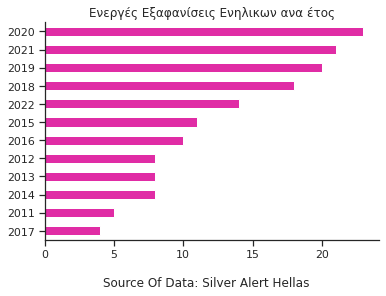

In [26]:
df['Year'].value_counts(ascending=True).plot(kind='barh', title='Ενεργές Εξαφανίσεις Ενηλικων ανα έτος', color= np.random.rand(3))
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12, y=0)

Text(0.5, 0, 'Source Of Data: Silver Alert Hellas')

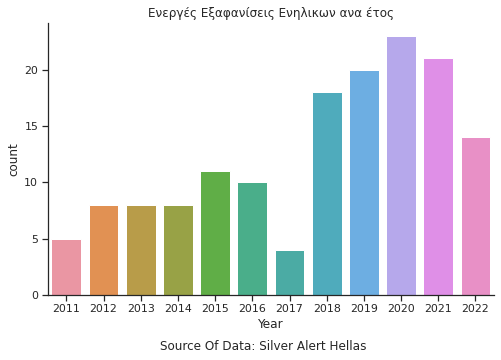

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Year).set(title='Ενεργές Εξαφανίσεις Ενηλικων ανα έτος')
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12, y=0)

In [15]:
df['Month'].value_counts()

7     22
5     21
6     14
9     14
4     13
10    13
2     10
3      9
12     9
8      9
1      8
11     8
Name: Month, dtype: int64

Text(0.5, 0, 'Source Of Data: Silver Alert Hellas')

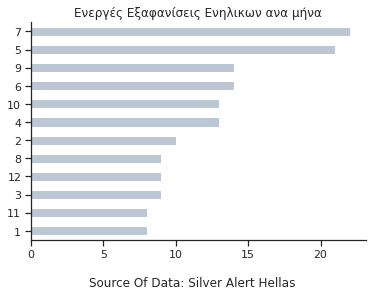

In [27]:
df['Month'].value_counts(ascending=True).plot(kind='barh', title='Ενεργές Εξαφανίσεις Ενηλικων ανα μήνα', color= np.random.rand(3))
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12, y=0)

Text(0.5, 0, 'Source Of Data: Silver Alert Hellas')

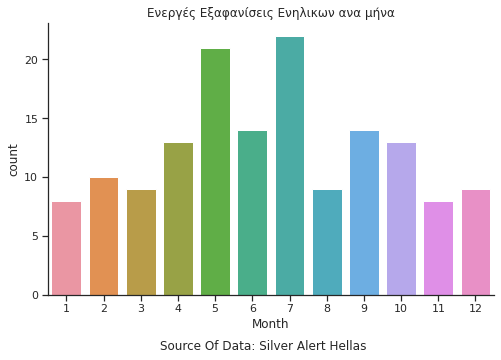

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Month).set(title='Ενεργές Εξαφανίσεις Ενηλικων ανα μήνα')
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12, y=0)

In [18]:
df['Age'].mean()

66.72222222222223

In [19]:
df['Age'].value_counts()

77.0    4
80.0    4
65.0    3
76.0    3
81.0    3
74.0    2
84.0    2
36.0    2
35.0    2
61.0    2
90.0    2
75.0    2
85.0    2
46.0    1
73.0    1
54.0    1
89.0    1
83.0    1
19.0    1
43.0    1
55.0    1
64.0    1
88.0    1
27.0    1
95.0    1
69.0    1
45.0    1
71.0    1
23.0    1
52.0    1
41.0    1
70.0    1
40.0    1
82.0    1
Name: Age, dtype: int64

Text(0.5, 0, 'Source Of Data: Silver Alert Hellas')

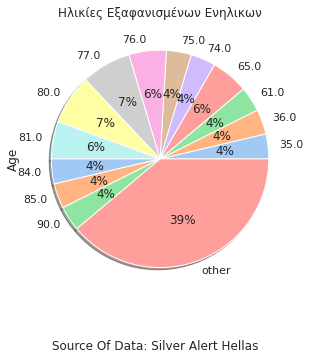

In [20]:
s=df['Age'].value_counts()
s.groupby(np.where(s>=2,s.index,'other')).sum().plot(kind='pie', shadow = True, figsize=(5,5), autopct='%1.0f%%', title='Ηλικίες Εξαφανισμένων Ενηλικων')
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12, y=0)

Ας φτιάξω και μια στήλη που θα μου βάζει την ηλικία ανα δεκαετίες-κατηγορία π.χ 30, 40, 50, 60, 70, 80, 90. Και ας ξανακάνω το γράφημα.

In [28]:
df.loc[df['Age'].between(20,29), 'age_group'] = 20
df.loc[df['Age'].between(30,39), 'age_group'] = 30
df.loc[df['Age'].between(40,49), 'age_group'] = 40
df.loc[df['Age'].between(50,59), 'age_group'] = 50
df.loc[df['Age'].between(60,69), 'age_group'] = 60
df.loc[df['Age'].between(70,79), 'age_group'] = 70
df.loc[df['Age'].between(80,89), 'age_group'] = 80
df.loc[df['Age'].between(90,99), 'age_group'] = 90

In [29]:
df.head()

,Name,Datetime,Tags,Url,Age,Year,Month,age_group
0,ΟΛΥΜΠΙΑΔΑ ΡΗΓΑ,2022-06-25 22:44:41,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%bf%ce%bb%cf%...,54.0,2022,6,50.0
1,ΦΑΝΗ ΠΑΡΑΦΕΣΤΑ,2022-06-20 15:35:19,Εξαφανισθέντες,https://www.lifelinehellas.gr/%cf%86%ce%b1%ce%...,45.0,2022,6,40.0
2,ΕΥΓΕΝΙΑ – ΜΑΡΙΑ ΒΟΥΝΙΟΖΟΥ,2022-05-31 11:04:55,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%bc%ce%b1%cf%...,36.0,2022,5,30.0
3,ΕΥΦΗΜΙΑ ΔΗΜΟΠΟΥΛΟΥ,2022-05-23 21:22:33,Εξαφανισθέντες,https://www.lifelinehellas.gr/11294-2/,77.0,2022,5,70.0
4,ΚΩΝΣΤΑΝΤΙΝΟΣ ΖΑΦΕΙΡΟΠΟΥΛΟΣ,2022-05-12 21:06:44,Εξαφανισθέντες,https://www.lifelinehellas.gr/%ce%ba%cf%89%ce%...,35.0,2022,5,30.0


In [30]:
df['age_group'].value_counts()

80.0    15
70.0    14
60.0     7
40.0     5
30.0     4
50.0     3
90.0     3
20.0     2
Name: age_group, dtype: int64

Text(0.5, 0, 'Source Of Data: Silver Alert Hellas')

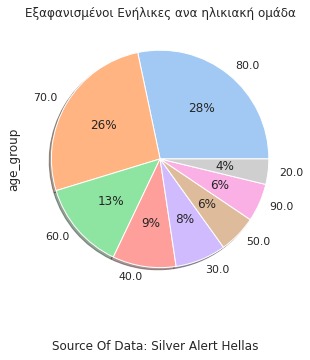

In [35]:
ag=df['age_group'].value_counts().plot(kind='pie', shadow = True, figsize=(5,5), autopct='%1.0f%%', title='Εξαφανισμένοι Ενήλικες ανα ηλικιακή ομάδα')
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12, y=0)

Text(0.5, 0, 'Source Of Data: Silver Alert Hellas')

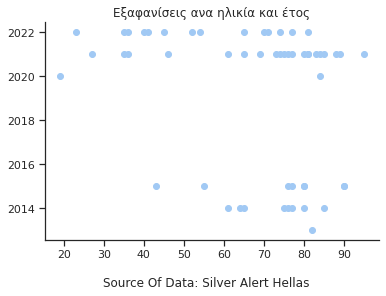

In [21]:
plt.scatter(df.Age, df.Year)
plt.title('Εξαφανίσεις ανα ηλικία και έτος')
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12, y=0)

Text(0.5, 0, 'Source Of Data: Silver Alert Hellas')

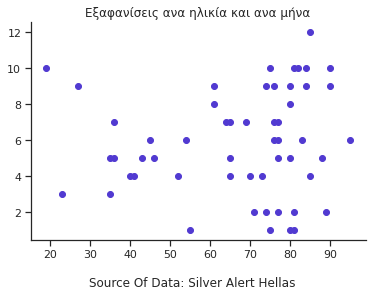

In [22]:
plt.scatter(df.Age, df.Month, color= np.random.rand(3))
plt.title('Εξαφανίσεις ανα ηλικία και ανα μήνα')
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12, y=0)